In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
df_movies= movies[['title','genres','production_companies','budget','revenue','vote_average','vote_count']]
df_movies.head()

,title,genres,production_companies,budget,revenue,vote_average,vote_count
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",237000000,2787965087,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",300000000,961000000,6.9,4500
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",245000000,880674609,6.3,4466
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",250000000,1084939099,7.6,9106
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",260000000,284139100,6.1,2124


In [5]:
movies_barh = df_movies.sort_values('revenue', ascending=False).head(15)

**Топ 15 самых высокодоходных фильмов**

Самые высокодоходные фильмы Avatar и Titanic ссняты одним и тем же режиссером Дж.Кэмерон

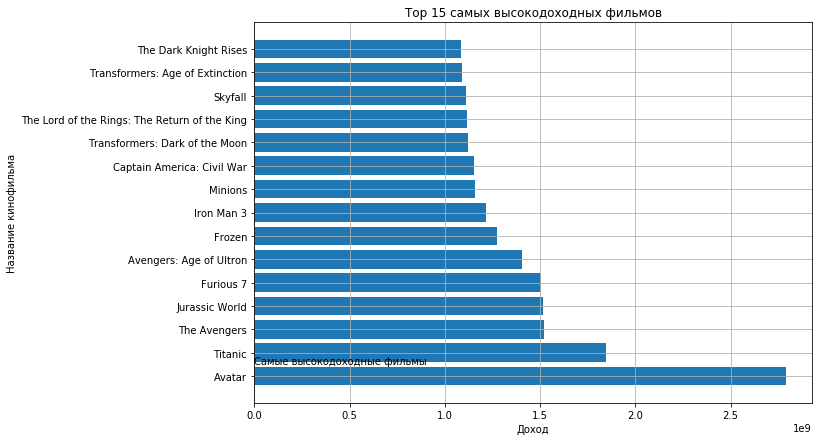

In [6]:

plt.barh(movies_barh['title'], movies_barh['revenue'])
plt.xlabel('Доход')
plt.ylabel('Название кинофильма')
plt.title('Top 15 самых высокодоходных фильмов')
plt.text(1.5, 0.5, 'Самые высокодоходные фильмы')
plt.grid()

In [7]:
df = movies_barh['revenue']-movies_barh['budget']
df.index = movies_barh['title']

Разница между бюджетом фильма и доходом от него

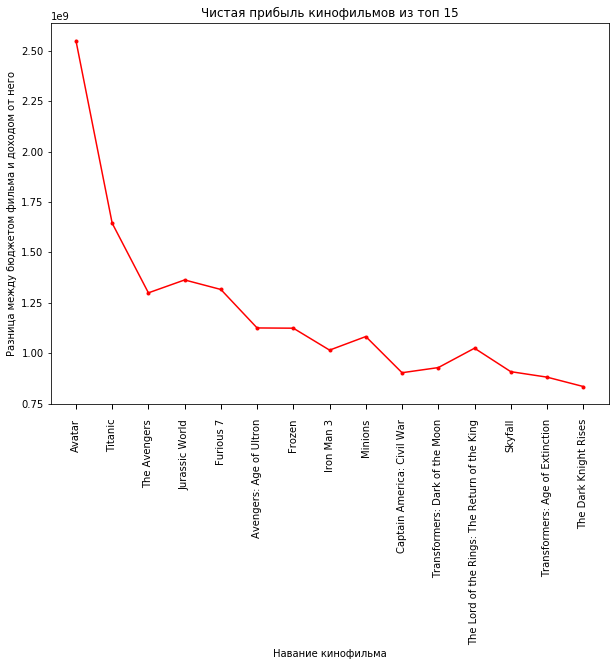

In [8]:
fig, ax = plt.subplots()
ax.plot(movies_barh['title'], df, color = 'r', marker = '.', label = 'revenue')
#ax.plot(movies_barh['title'], movies_barh['budget'], color = 'b', marker = '.', label = 'budget')
plt.xlabel('Навание кинофильма')
plt.ylabel('Разница между бюджетом фильма и доходом от него')
plt.title('Чистая прибыль кинофильмов из топ 15')
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 5,    #  Длинна делений
               width = 1,     #  Ширина делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelbottom = True,    #  Рисуем подписи снизу
               labelrotation = 90)    #  Поворот подписей

**Гипотеза:** Влияет ли бюджет фтльма, на его рейтинг

**Ответ:** Данное распределение показывает, что количество денег потраченных на производства не оказывает влияние на то, какой рейтинг у него будет, и в среднем мы видим, что оценки фильмов при разных бюджетах схожи

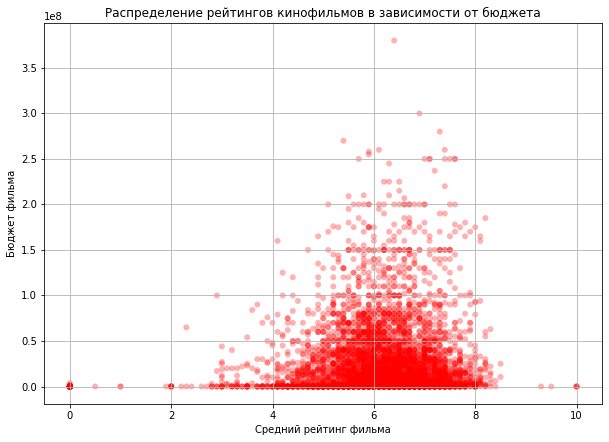

In [9]:
budget = df_movies.budget
vote_average = df_movies.vote_average
fig, ax = plt.subplots()
ax.scatter(vote_average, budget, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Средний рейтинг фильма')
plt.ylabel('Бюджет фильма')
plt.title('Распределение рейтингов кинофильмов в зависимости от бюджета')
plt.show()

**Гипотеза:** какие в основном оценки ставят зрители?

**Ответ:** В основном большинство рейтингов фильмов это 6, с неболшим размахом, приблизительно в 0.5

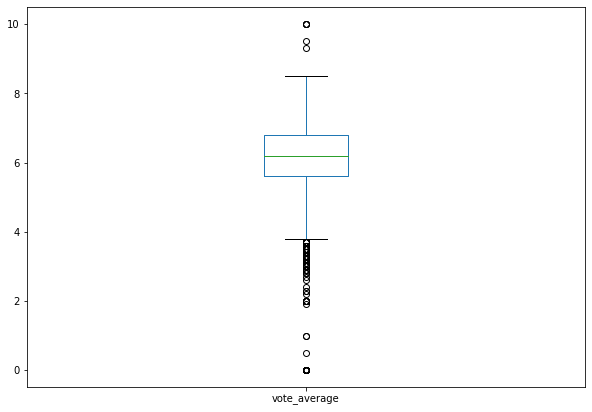

In [10]:
df_movies['vote_average'].plot(kind='box')

In [ ]:
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']])
sns_plot

In [11]:
from ast import literal_eval

In [12]:
features = [ 'keywords', 'genres','production_companies','production_countries','spoken_languages']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [13]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        names =' '.join(names[:1])
    return names

for feature in features:
    movies[feature] = movies[feature].apply(get_list)
    
movies[['title','keywords', 'genres','production_companies','production_countries','spoken_languages']].sample(5)

,title,keywords,genres,production_companies,production_countries,spoken_languages
3941,Letters to God,letter,Action,Mercy Creek Entretainment,United States of America,English
654,Blade: Trinity,fbi,Science Fiction,New Line Cinema,United States of America,Esperanto
980,The Life of David Gale,prison,Drama,Mikona Productions GmbH & Co. KG,Germany,English
937,Hansel & Gretel: Witch Hunters,witch,Fantasy,Paramount Pictures,United States of America,English
4394,The Last Big Thing,magazine,Comedy,Byronic Pose Productions,United States of America,English


In [14]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
platform_genre_sales = movies.pivot_table(
                        index='production_countries', 
                        columns='genres', 
                        values='vote_average', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

genres,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
production_countries,,,,,,,,,,,,,,,,,,,,,
,35.4,61.3,12.9,7.1,172.5,9.0,108.8,282.6,0.0,0.0,...,0.0,51.7,0.0,6.5,22.8,9.0,0.0,10.2,6.3,0.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,6.0,0.0,15.2,0.0,29.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aruba,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,0.0,6.8,6.0,0.0,0.0,0.0,0.0,5.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkey,0.0,0.0,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United Arab Emirates,0.0,4.7,0.0,0.0,9.7,6.5,0.0,19.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import seaborn as sns

In [38]:
movies1 = movies.groupby(['production_companies']).agg({'vote_average': 'mean', 'revenue': 'mean',}).reset_index()

In [39]:
movies1.sort_values('vote_average', ascending=False).head(15)

,production_companies,vote_average,revenue
451,Fly High Films,10.0,0.000000e+00
818,Nelson Entertainment,8.5,1.235090e+05
1183,Toho Company,8.2,2.718410e+05
512,Gospel of John Ltd.,8.2,4.069090e+06
1112,Sullivan Entertainment,8.2,0.000000e+00
152,Blue Parrot Productions,8.1,2.334157e+07
368,Eficine 226,8.1,0.000000e+00
737,Magidson Films,8.0,0.000000e+00
1156,The Mirisch Corporation,8.0,2.500000e+07
414,FallsApart Productions,8.0,0.000000e+00


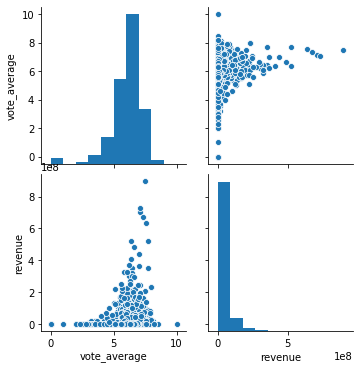

In [40]:
sns_plot = sns.pairplot(
   movies1[['vote_average', 'revenue']])
sns_plot

In [41]:
movies2 = movies.groupby(['genres']).agg({'vote_average': 'mean', 'revenue': 'mean',}).reset_index()

In [42]:
movies2.sort_values('vote_average', ascending=False).head(15)

,genres,vote_average,revenue
10,Foreign,7.200000,5.565000e+04
11,History,6.628000,7.277602e+07
19,War,6.595833,6.471706e+07
7,Drama,6.430240,4.536260e+07
5,Crime,6.428718,4.832888e+07
20,Western,6.414815,4.957033e+07
2,Adventure,6.305605,2.109611e+08
3,Animation,6.273984,2.417656e+08
13,Music,6.252941,3.170353e+07
15,Romance,6.194340,6.575061e+07


Cравним пользовательские оценки топ-5 жанров

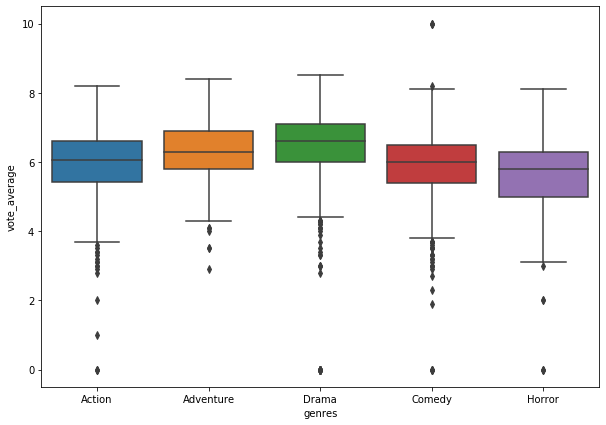

In [47]:
top_genres = movies.genres.value_counts().sort_values(ascending = False).head(5).index.values
top_genres
ax = sns.boxplot(x="genres", y="vote_average", 
            data=movies[movies.genres.isin(top_genres)])


In [ ]:
Cравним доходы от топ-5 жанров кинофильмов

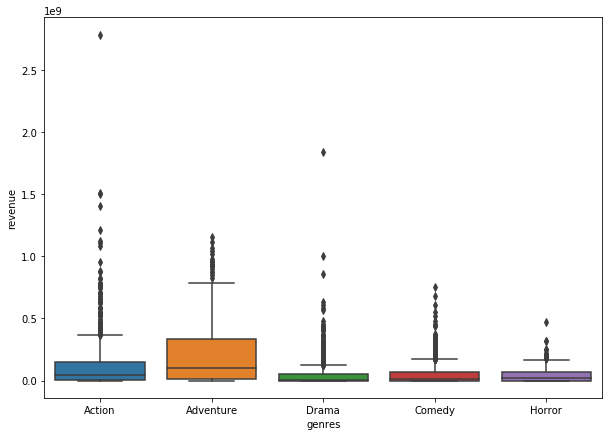

In [48]:
top_genres = movies.genres.value_counts().sort_values(ascending = False).head(5).index.values
top_genres
ax = sns.boxplot(x="genres", y="revenue", 
            data=movies[movies.genres.isin(top_genres)])